In [47]:
# Importing pandas and seaborn libraries for data manipulation and charting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
# Import data from CSV file
data = pd.read_csv('churn_clean.csv')

In [49]:
# Function to clean column names

def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df


In [50]:
# Renaming columns for the columns related to survey questions
data.rename(columns={'Item1':'Timely_response','Item2':'Timely_fixes','Item3':'Timely_replacements',
                     'Item4':'Reliability','Item5':'Options','Item6':'Respectful_response',
                     'Item7':'Courteous_exchange','Item8':'Evidence_of_active_listening'}, inplace=True)

In [51]:
# Check for null values
data.isna().any(axis=0).any()

False

In [52]:
# Checking number of unique values in each column
data.nunique()

CaseOrder                       10000
Customer_id                     10000
Interaction                     10000
UID                             10000
City                             6058
State                              52
County                           1620
Zip                              8583
Lat                              8563
Lng                              8630
Population                       5933
Area                                3
TimeZone                           25
Job                               639
Children                           11
Age                                72
Income                           9993
Marital                             5
Gender                              3
Churn                               2
Outage_sec_perweek               9986
Email                              23
Contacts                            8
Yearly_equip_failure                6
Techie                              2
Contract                            3
Port_modem  

In [53]:
# Check all the unique values for all the columns having less than 100 unique values
# Avoiding the value prints for those columns which have large number of unique values like zipcode or counties etc.

for col in data.columns:
    if data[col].nunique()<100:
        print(col, sorted(data[col].unique()), '\n')


State ['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'] 

Area ['Rural', 'Suburban', 'Urban'] 

TimeZone ['America/Anchorage', 'America/Boise', 'America/Chicago', 'America/Denver', 'America/Detroit', 'America/Indiana/Indianapolis', 'America/Indiana/Knox', 'America/Indiana/Marengo', 'America/Indiana/Petersburg', 'America/Indiana/Tell_City', 'America/Indiana/Vincennes', 'America/Indiana/Winamac', 'America/Juneau', 'America/Kentucky/Louisville', 'America/Los_Angeles', 'America/Menominee', 'America/New_York', 'America/Nome', 'America/North_Dakota/New_Salem', 'America/Ojinaga', 'America/Phoenix', 'America/Puerto_Rico', 'America/Sitka', 'America/Toronto', 'Pacific/Honolulu'] 

Children [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 

Age [18, 19

In [54]:
# Following data columns are not important for data analysis (more details included in the report)
to_drop = ['City','County','Zip','Job','TimeZone',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State']

In [55]:
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [56]:
# Check data by printing first few rows
data.head()

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
0,38,Urban,0,68,28561.99,Widowed,Male,No,7.978323,10,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,Urban,1,27,21704.77,Married,Female,Yes,11.699080,12,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,Urban,4,50,9609.57,Widowed,Female,No,10.752800,9,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,Suburban,1,48,18925.23,Married,Male,No,14.913540,15,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,Suburban,0,83,40074.19,Separated,Male,Yes,8.147417,16,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [57]:
# Check data by printing last few rows
data.tail()

,Population,Area,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Timely_response,Timely_fixes,Timely_replacements,Reliability,Options,Respectful_response,Courteous_exchange,Evidence_of_active_listening
9995,640,Rural,3,23,55723.74,Married,Male,No,9.415935,12,...,159.9794,6511.252601,3,2,3,3,4,3,2,3
9996,77168,Rural,4,48,34129.34,Divorced,Male,No,6.740547,15,...,207.4811,5695.951810,4,5,5,4,4,5,2,5
9997,406,Rural,1,48,45983.43,Never Married,Female,No,6.590911,10,...,169.9741,4159.305799,4,4,4,4,4,4,4,5
9998,35575,Urban,1,39,16667.58,Separated,Male,No,12.071910,14,...,252.6240,6468.456752,4,4,6,4,3,3,5,4
9999,12230,Urban,1,28,9020.92,Never Married,Male,No,11.754720,17,...,217.4840,5857.586167,2,2,3,3,3,3,4,1


In [58]:
# Following columns have categorical data types and they need to be converted to dummy variables
dummy_variable_columns = [
                          'Churn','Area','Marital','Gender','Techie','Contract','Port_modem','Tablet',
                         'InternetService','Phone', 'Multiple','OnlineSecurity','OnlineBackup',
                          'DeviceProtection','TechSupport', 'StreamingTV','StreamingMovies',
                          'PaperlessBilling','PaymentMethod'
                         ]


# Following columns have continuous numerical data, which needs to be scaled before predictive model can be created.
# Hence, these columns will be transformed to normalized form.

to_transform = ['Population','Children','Age','Income','Outage_sec_perweek','Email',
                'Contacts','Yearly_equip_failure','Tenure',
                'MonthlyCharge','Bandwidth_GB_Year',
                'Timely_response','Timely_fixes','Timely_replacements',
                'Reliability','Options',
                'Respectful_response','Courteous_exchange',
                'Evidence_of_active_listening'
               ]

dummy_data_file_index = 0

In [59]:
from sklearn.preprocessing import MinMaxScaler

def get_dummy_data_with_output(dummy_variable_columns, data):
    global dummy_data_file_index
    dummy_data = pd.get_dummies(data, prefix=dummy_variable_columns, columns=dummy_variable_columns, drop_first= True)
    dummy_data = column_name_remove_space(dummy_data)
    dummy_data.to_csv('dummy_var_data'+str(dummy_data_file_index)+'.csv', index=False)
    y = dummy_data['Churn_Yes']
    dummy_data.drop(columns=['Churn_Yes'], inplace=True)
    sc = MinMaxScaler()
    dummy_data.loc[:,to_transform] = sc.fit_transform(dummy_data.loc[:,to_transform])
    dummy_data_file_index += 1
    return y, dummy_data

y, X = get_dummy_data_with_output(dummy_variable_columns, data)

In [60]:
# Starting with imports

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [61]:
# Split the training and test set 7:3 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=0)

In [62]:
# Creating reusable functions to create prediction models and print their performance measures

# Function to plot confusion matrix
def confusion_matrix_plot(y_test, y_pred):
    plt.matshow(confusion_matrix(y_test, y_pred))
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(b=None)
    plt.show()

# Function to create KNN model with default parameters
def get_knn_model(y_train,X_train, X_test):
    model = KNeighborsClassifier(n_jobs=-1)
    model.fit(X_train, y_train)
    print(model.get_params())
    y_pred = list(map(round, model.predict(X_test)))
    arr = np.c_[y_pred, y_test]
    print('\nPrinting predicted and actual values:\n',arr)
    print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    return model, arr

# Creating a function to create prediction model for Logistic Regression
def get_lr_model(y_train,X_train, X_test):
    model = LogisticRegression(max_iter=100000000)
    model.fit(X_train, y_train)
    arr = np.c_[X_train.columns.tolist(),model.coef_[0]]
    intercept = model.intercept_[0]
    print('\nPrinting model coefficients and intercept summary for sklearn model:\n',arr, model.intercept_)
    y_pred = model.predict(X_test)
    print('\nPrinting predicted and actual values from sklearn:\n',np.c_[y_pred, y_test])
    print('Confusion Matrix from sklearn\n',confusion_matrix(y_test, y_pred))
    print('Accuracy Scores from sklearn:\n',accuracy_score(y_test, y_pred))
    print('Classification Report from sklearn:\n',classification_report(y_test, y_pred))
    confusion_matrix_plot(y_test, y_pred)
    return model, arr, intercept


# Function to create AUC chart and print AUC score.
def roc(model, X_test, y_test):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:,1])
    plt.plot(fpr, tpr, marker='.')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    print('AUC: %.3f' % roc_auc_score(y_test, probs[:,1]))

# Function to create AUC Charts for multiple models
def roc_multi(models, X_test, y_test):
    for model in models:
        probs = models[model].predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, probs[:,1])
        plt.plot(fpr, tpr, marker='.', label=model)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="upper right")
    plt.show()


{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[2025  176]
 [ 347  452]]
Accuracy Score:  0.8256666666666667


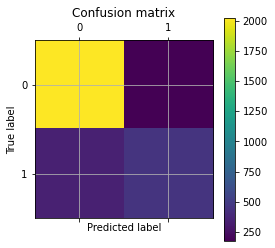

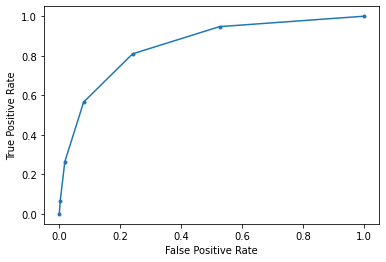

AUC: 0.851

Printing model coefficients and intercept summary for sklearn model:
 [['Population' '-0.3571353119248265']
 ['Children' '0.14907969150988956']
 ['Age' '-0.1957807870726397']
 ['Income' '0.1076751391461641']
 ['Outage_sec_perweek' '-0.08163654038717752']
 ['Email' '-0.21549185658406636']
 ['Contacts' '0.5218700762367565']
 ['Yearly_equip_failure' '0.012739510504345256']
 ['Tenure' '-4.90294623047516']
 ['MonthlyCharge' '4.375491552759035']
 ['Bandwidth_GB_Year' '-3.4205510412521187']
 ['Timely_response' '-0.3870986164698337']
 ['Timely_fixes' '0.142830830877891']
 ['Timely_replacements' '0.2971629694860255']
 ['Reliability' '0.036733654398256176']
 ['Options' '-0.17987765343620193']
 ['Respectful_response' '-0.09405837772551577']
 ['Courteous_exchange' '-0.026359416986186164']
 ['Evidence_of_active_listening' '0.15997071456750983']
 ['Area_Suburban' '-0.040335033513940674']
 ['Area_Urban' '0.19243417754858205']
 ['Marital_Married' '0.09668817898557164']
 ['Marital_Never_Mar

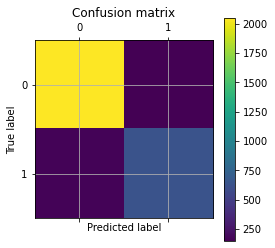

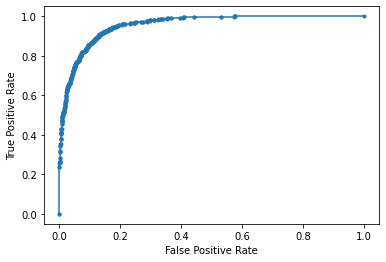

AUC: 0.956


In [63]:
# Run knn model
model_knn, arr_knn = get_knn_model(y_train,X_train, X_test);
roc(model_knn, X_test, y_test);
# Run logistic regression model
model_lr, arr, intercept = get_lr_model(y_train,X_train, X_test);
roc(model_lr, X_test, y_test);

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[2024  177]
 [ 322  477]]
Accuracy Score:  0.8336666666666667


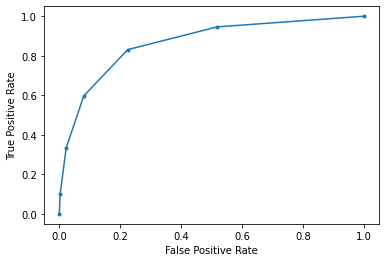

AUC: 0.864


In [64]:
model = KNeighborsClassifier(n_jobs=-1, p=1)
model.fit(X_train, y_train)
print(model.get_params())
y_pred = list(map(round, model.predict(X_test)))
arr = np.c_[y_pred, y_test]
print('\nPrinting predicted and actual values:\n',arr)
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
roc(model, X_test, y_test);

{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[2101  100]
 [ 348  451]]
Accuracy Score:  0.8506666666666667


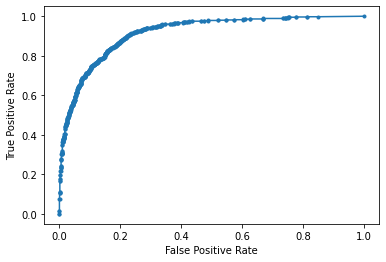

AUC: 0.916


In [65]:
# for parameter tuning leaf_size parameter range was chosen 1 to 100
# n_neighbors range was chosen 10 to 100
# As it takes a long time for the code to run, for demonstration, the ranges have been reduced.
parameter_tuning = {'leaf_size':list(range(1,2)),'n_neighbors': list(range(17,19)),'weights': ['uniform','distance']}

from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=-1, p=1)
gsc = GridSearchCV(estimator=knn, param_grid=parameter_tuning, scoring = 'accuracy', cv=5)
model_gsc = gsc.fit(X_train,y_train)
print (model_gsc.best_estimator_.get_params())
y_pred = list(map(round, model_gsc.best_estimator_.predict(X_test)))
arr = np.c_[y_pred, y_test]
print('\nPrinting predicted and actual values:\n',arr)
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
roc(model_gsc.best_estimator_, X_test, y_test);

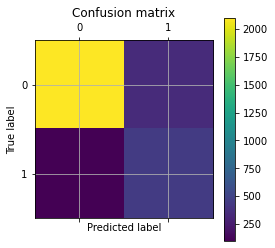

In [66]:
confusion_matrix_plot(y_pred, y_test)

In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      2201
           1       0.82      0.56      0.67       799

    accuracy                           0.85      3000
   macro avg       0.84      0.76      0.79      3000
weighted avg       0.85      0.85      0.84      3000



{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': -1, 'n_neighbors': 18, 'p': 1, 'weights': 'distance'}

Printing predicted and actual values:
 [[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]
Confusion Matrix 
 [[2101  100]
 [ 348  451]]
Accuracy Score:  0.8506666666666667


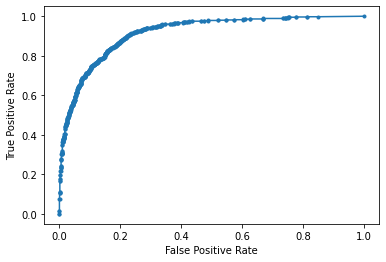

AUC: 0.916


In [68]:
model = KNeighborsClassifier(algorithm= 'auto', leaf_size= 1, n_jobs= -1, n_neighbors= 18, p= 1, weights= 'distance')
model.fit(X_train, y_train)
print(model.get_params())
y_pred = list(map(round, model.predict(X_test)))
arr = np.c_[y_pred, y_test]
print('\nPrinting predicted and actual values:\n',arr)
print('Confusion Matrix \n',confusion_matrix(y_test, y_pred))
print('Accuracy Score: ',accuracy_score(y_test, y_pred))
roc(model, X_test, y_test);

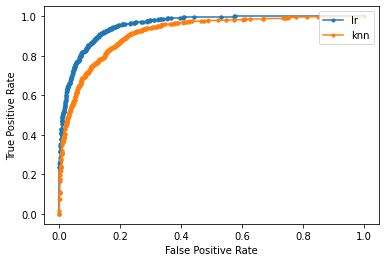

In [69]:


models = {'lr': model_lr, 'knn':model_gsc.best_estimator_}
roc_multi(models, X_test, y_test)